# MY Project Data Wrangling
The main purpose of this project is to use real world data to wrangle (gather, assess, clean) and then apply analysis with visualizations. The data used was from the Twitter account ‘WeRateDogs’ (@dog_rates) which “rates people's dogs with a humorous comments about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.” (Project Overview, Udacity). There are three pieces of data that will be gathered, cleaned, and then merged together to make one final DataFrame to analyze.

> By Ahmed Elsayed



## Gathering the Data
First table archive downloaded from the internet manually and programmatically opened into a pandas DataFrame.



In [1]:
!pip install tweepy

     |████████████████████████████████| 153kB 11.9MB/s 


In [2]:
# Downloading and importing all the necessary libraries to complete the project.
import pandas as pd
import requests
import tweepy
import os
import json
import numpy as np
import re
%matplotlib inline

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tweet_json.txt
/kaggle/input/twitter-archive-enhanced.csv


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

Since, the input directory is a read-only directory. So,we can write the file into the working directory.

In [5]:
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/image-predictions.tsv
/kaggle/working/__notebook__.ipynb
/kaggle/working/__output__.json


Get your credentials from [here](https://developer.twitter.com/en.html)    

In [6]:
consumer_key = 'U4hUt6MkwsBunrLeP7gBrfs9q'
consumer_secret = '9RBX4KeUOxVhBRab0TBHjDcJp9hcSyvHieyA50as2auN5PxzWJ'
access_token = '1929558530-UuS1sgoWlZtz5xHhJVbWpq0pWoCdR9X7H8Cq89P'
access_secret = '36sqFNfP4b8QIY374adQUgUBrk0Ui5UEB4i3Z5e2qS5Qm'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [8]:
#Code template above provided by Udacity.

df_twitter_archive = pd.read_csv('../input/twitter-archive-enhanced.csv')

In [9]:
for tweet_id in df_twitter_archive.tweet_id:
    try:
        tweet_json = api.get_status(tweet_id, tweet_mode = 'extented')
        with open('/kaggle/working/tweet_json.txt', mode='a') as file:
            json.dump(tweet_json, file)
            file.write('\n')
    except Exception as e:
        print(str(tweet_id) + ': ' + str(e))

888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130: [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560: [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705: [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984: [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648: [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778: [{'code': 144, 'mess

In [10]:
lists = [] #an empyty list to store a dictionaries
with open('/kaggle/working/tweet_json.txt') as file:
    lines = file.read().splitlines()
    for line in lines:
        data = json.loads(line)
        row = {
            'tweet_id'      : data['id'],
            'retweet_count' : data['retweet_count'],
            'favorite_count': data['favorite_count']
        }
        lists.append(row)
df_tweet_data = pd.DataFrame(lists,columns=['tweet_id','retweet_count','favorite_count'])

In [11]:
# Downloading the image predictions from the internet

df_img_predictions = pd.read_csv('/kaggle/working/image-predictions.tsv', sep='\t')

## Assess
Visual

In [12]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
df_tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7931,37120
1,892177421306343426,5893,31938
2,891815181378084864,3895,24048
3,891689557279858688,8085,40440
4,891327558926688256,8774,38666
5,891087950875897856,2913,19428
6,890971913173991426,1936,11337
7,890729181411237888,17696,62619
8,890609185150312448,4016,26735
9,890240255349198849,6900,30611


In [15]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [18]:
all_columns = pd.Series(list(df_twitter_archive) + list(df_img_predictions) + list(df_tweet_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [19]:
df_twitter_archive.tweet_id.nunique()

2356

In [20]:
df_img_predictions.tweet_id.nunique()

2075

In [21]:
df_tweet_data.tweet_id.nunique()

2333

In [22]:
df_twitter_archive[df_twitter_archive.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
df_twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748...,12,10,None,None,None,None,None
1486,693109034023534592,NaN,NaN,2016-01-29 16:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Thank you friend that was a swell petting"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693109034...,11,10,None,None,None,None,None
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None
2005,672272411274932228,NaN,NaN,2015-12-03 04:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippin. He is terrified of his new lit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672272411...,11,10,Pippin,None,None,None,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None
2206,668631377374486528,NaN,NaN,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,None,None,None,None
1723,680100725817409536,NaN,NaN,2015-12-24 19:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This pupper is not coming inside until she cat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680100725...,11,10,None,None,None,pupper,None
1697,681231109724700672,NaN,NaN,2015-12-27 21:52:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681231109...,11,10,None,None,None,pupper,None
1947,673700254269775872,NaN,NaN,2015-12-07 03:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Large blue dog here. Cool shades. Flipping us ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673700254...,3,10,None,None,None,None,None


In [25]:
df_twitter_archive.name.isnull().sum()

0

In [26]:
df_twitter_archive.loc[np.random.randint(0,df_twitter_archive.shape[0],40), ['text','name']]

,text,name
1079,Here's a doggo blowing bubbles. It's downright...,None
1622,"""Hello yes I'll just get one of each color tha...",None
753,RT @dog_rates: In case you haven't seen the mo...,None
2179,This is Tucker. He is 100% ready for the sport...,Tucker
620,#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,None
219,This is Riley. He's making new friends. Jubila...,Riley
175,This is Rosie. She was just informed of the wa...,Rosie
1153,This is Lola. She's a Butternut Splishnsplash....,Lola
863,Meet Glenn. Being in public scares him. Fright...,Glenn
672,This is Ralphy. His dreams were just shattered...,Ralphy


In [27]:
df_twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Comet         1
Snicku        1
Zara          1
Napolean      1
Bert          1
Name: name, Length: 957, dtype: int64

In [28]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [30]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
df_img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
df_tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2791.501072,7740.590656
std,6.820607e+16,4724.898821,12015.145793
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,560.000000,1340.000000
50%,7.184547e+17,1303.000000,3373.000000
75%,7.986654e+17,3249.000000,9499.000000
max,8.924206e+17,80222.000000,160392.000000


### Quality
- Missing and incorrect dog names extracted from text. 'a' is the most popular name which itself is not a name.
- Timestamp is in string format.
- Source not extracted properly from hyperlink tag.
- A lot of null values are not null.
- Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp, have a lot of null values.
- Gender of dog could be extracted from text.
- Hashtags could also be extracted.
- Absurd rating values.
- Records without dog breed prediction

### Tidiness
- The dog stage columns in twitter_archive can be arranged into a single column.
- The image predictions could be condensed to show just the most confident dog breed prediction.
- All three dataframes can be combined into one single dataframe.

## Clean
Cleaning process consists of three steps: Define, code & Test. First we define how to tackle the issue. Then, we code to resolve the issue and finally we test our code to see if the issues with the data have been resolved. So, in order to clean these 3 dataframes, I carried out the 3 steps for each of the issues and was finally able to achive a clean dataframe. For cleaning purposes, I used pandas's functions: cut, merge, apply, etc. The cleaned dataset was then stored into a csv file.

In [33]:
#Create a copy of all the gathered dataframes
df_twitter_archive_copy = df_twitter_archive.copy()
df_img_predictions_copy = df_img_predictions.copy()
df_tweet_data_copy = df_tweet_data.copy()

### Missing Data

#### Missing and incorrect dog names extracted from text

##### Define
Extract the correct names from the text column using regular expression and also get rid of the incorrect names like 'a', 'an', 'the',etc. <b>search()</b> function of the <b>re</b> library can be used to extract the names from the text. Notice that the dog names always start with an uppercase character and then is followed by all lowercase characters.

##### Code

In [34]:
#In the text the name always starts with a capital letter.
def extract_name_from_text(row):
    try:
        if 'This is' in row['text']:
            name = re.search('This is ([A-Z]\w+)',row['text']).group(1)
        elif 'Meet' in row.text:
            name = re.search('Meet ([A-Z]\w+)', row['text']).group(1)
        elif 'Say hello to' in row.text:
            name = re.search('Say hello to ([A-Z]\w+)', row['text']).group(1)
        elif 'named' in row.text:
            name = re.search('named ([A-Z]\w+)', row['text']).group(1)
        else:
            name = ''
    except AttributeError:
        name = ''
    return name

In [35]:
df_twitter_archive_copy['name'] = df_twitter_archive_copy.apply(extract_name_from_text, axis=1)

##### Test

In [36]:
df_twitter_archive_copy.name.value_counts()

            856
Charlie      12
Lucy         11
Oliver       11
Cooper       11
           ... 
Ralph         1
Link          1
Bluebert      1
Newt          1
Clybe         1
Name: name, Length: 931, dtype: int64

#### Source not extracted properly from hyperlink tag

##### Define
Extract the proper source of the dog tweet using regular expression and since there are only 4 unique sources convert source to a categorical variable. Create a generic function to extract the sources and then use <b>apply()</b> function of the <b>pandas</b> library to apply the function to the entire column.

##### Code

In [37]:
def extract_source(row):
    try:
        source = re.search('>(.+)</a>', row['source']).group(1)
    except AttributeError:
        source = ''
    return source

In [38]:
df_twitter_archive_copy['source'] = df_twitter_archive_copy.apply(extract_source, axis=1)
df_twitter_archive_copy['source'] = df_twitter_archive_copy.source.astype('category')

##### Test

In [39]:
df_twitter_archive_copy.source.dtype

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine - Make a Scene'],
                 ordered=False)

In [40]:
df_twitter_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Gender of the dog could be extracted from text

##### Define
On assessing it can be seen that almost all of the texts are indicative of the gender of the dog as 'He'/'She' is used. Extract the gender of the dog tweet using string operations by searching for He/She in the text.

##### Code

In [41]:
def extract_gender(row):
    if 'He' in row['text']:
        gender = 'M'
    elif 'She' in row['text']:
        gender = 'F'
    else:
        gender = ''
    return gender

In [42]:
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.apply(extract_gender, axis=1)
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.gender.astype('category')

##### Test

In [43]:
df_twitter_archive_copy.gender.dtype

CategoricalDtype(categories=['', 'F', 'M'], ordered=False)

In [44]:
df_twitter_archive_copy.gender.value_counts()

M    1144
      893
F     319
Name: gender, dtype: int64

#### Hashtags could also be extracted from text

##### Define
Extract the hashtag from the tweet using regular expressions. Since, # is always exceeded by alphanumeric characters and after the hashtag there is a whitespace or fullstop, a regular expression can be created.

##### Code

In [45]:
def extract_hashtag(row):
    try:
        if '#' in row['text']:
            hashtag = re.search('#(\w+)[\s\.]', row['text']).group(1)
        else:
            hashtag = float('NaN')
    except AttributeError:
        hashtag = ''
    return hashtag

df_twitter_archive_copy['hashtag'] = df_twitter_archive_copy.apply(extract_hashtag, axis=1)

##### Test

In [46]:
df_twitter_archive_copy.hashtag.value_counts()

BarkWeek                 9
PrideMonth               3
notallpuppers            1
BATP                     1
Canada150                1
dogsatpollingstations    1
WKCDogShow               1
ScienceMarch             1
LoveTwitter              1
ImWithThor               1
WomensMarch              1
BellLetsTalk             1
GoodDogs                 1
PrideMonthPuppo          1
NoDaysOff                1
FinalFur                 1
K9VeteransDay            1
Name: hashtag, dtype: int64

### Tidiness

#### The dog stage columns in `twitter_archive` can be arranged into a single column

#### Define
Condense the 4 dog stages(doggo, floofer, puppo, gender) into a single stage column and convert it into a categorical variable. Also, remove the unwanted columns.

In [47]:
def get_dog_stage(row):
    if 'doggo' in row['text'].lower():
        stage = 'doggo'
    elif 'floof' in row['text'].lower():
        stage = 'floofer'
    elif 'pupper' in row['text'].lower():
        stage = 'pupper'
    elif 'puppo' in row['text'].lower():
        stage = 'puppo'
    else:
        stage = ''
    return stage

In [48]:
df_twitter_archive_copy['stage'] = df_twitter_archive_copy.apply(get_dog_stage, axis=1)
df_twitter_archive_copy['stage'] = df_twitter_archive_copy.stage.astype('category')

In [49]:
df_twitter_archive_copy.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)

#### Test

In [50]:
df_twitter_archive_copy.stage.value_counts()

           1905
pupper      270
doggo       107
floofer      38
puppo        36
Name: stage, dtype: int64

In [51]:
df_twitter_archive_copy.stage.dtype

CategoricalDtype(categories=['', 'doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

In [52]:
list(df_twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'gender',
 'hashtag',
 'stage']

#### The `image predictions` could be condensed to show just the most confident dog breed prediction

##### Define
Instead of showing 3 predictions, show the top dog breed prediction. Only consider that prediction for which the dog prediction is true. Also, remove the unwanted columns.

##### Code

In [53]:
breed = []
confidence = []

def get_breed_and_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not identified')
        confidence.append(np.nan)
        
df_img_predictions_copy.apply(get_breed_and_confidence, axis=1)
df_img_predictions_copy['breed'] = pd.Series(breed)
df_img_predictions_copy['confidence'] = pd.Series(confidence)
df_img_predictions_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

##### Test

In [54]:
df_img_predictions_copy.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [55]:
df_img_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null object
confidence    1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


#### All three dataframes can be combined into one single dataframe

#### Define
All the columns in the 3 dataframes describe the dog data and can be fit into a single table for further analysis and visualisations. Use the pandas merge function to merge all the three dataframes on tweet_id.

#### Code

In [56]:
df = pd.merge(df_twitter_archive_copy, df_img_predictions_copy, on='tweet_id')
df = df.merge(df_tweet_data_copy, on='tweet_id')

#### Test

In [57]:
list(df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'gender',
 'hashtag',
 'stage',
 'jpg_url',
 'img_num',
 'breed',
 'confidence',
 'retweet_count',
 'favorite_count']

In [58]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,gender,hashtag,stage,jpg_url,img_num,breed,confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,M,NaN,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,7931,37120
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,F,NaN,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,5893,31938
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,M,NaN,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,3895,24048
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,F,NaN,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,8085,40440
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,M,BarkWeek,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,8774,38666


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 22 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null category
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
gender                        2061 non-null category
hashtag                       24 non-null object
stage                         2061 non-null category
jpg_url                       2061 non-null object
img_num                       2

### Quality

#### Records without dog breed prediction

##### Define
Remove the records from dataframe where breed is Not identified. Use pandas query() function to select the records accordingly.

##### Code

In [60]:
df = df.query('breed != "Not identified"')

##### Test

In [61]:
df.query('breed == "Not identified"').shape[0]

0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 1 to 2060
Data columns (total 22 columns):
tweet_id                      1738 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1738 non-null object
source                        1738 non-null category
text                          1738 non-null object
retweeted_status_id           59 non-null float64
retweeted_status_user_id      59 non-null float64
retweeted_status_timestamp    59 non-null object
expanded_urls                 1738 non-null object
rating_numerator              1738 non-null int64
rating_denominator            1738 non-null int64
name                          1738 non-null object
gender                        1738 non-null category
hashtag                       21 non-null object
stage                         1738 non-null category
jpg_url                       1738 non-null object
img_num                       1

#### Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp, have a lot of null values

##### Define
Remove these unwanted using drop function in pandas.

##### Code

In [63]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [64]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'gender', 'hashtag',
       'stage', 'jpg_url', 'img_num', 'breed', 'confidence', 'retweet_count',
       'favorite_count'],
      dtype='object')

#### Incorrect Data types

##### Define
tweet_id which is in int64 format should be in string format as we don't need to perform any mathematic operations on tweet_id. The timestamp should be an datetime object instead of string. Use pandas to_string() function to convert tweet_id to string and use to_datetime() function to convert timestamp to datetime object.

##### Code

In [65]:
df.tweet_id = df.tweet_id.to_string()
df.timestamp = pd.to_datetime(df.timestamp, yearfirst=True)

##### Test

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 1 to 2060
Data columns (total 17 columns):
tweet_id              1738 non-null object
timestamp             1738 non-null datetime64[ns, UTC]
source                1738 non-null category
text                  1738 non-null object
expanded_urls         1738 non-null object
rating_numerator      1738 non-null int64
rating_denominator    1738 non-null int64
name                  1738 non-null object
gender                1738 non-null category
hashtag               21 non-null object
stage                 1738 non-null category
jpg_url               1738 non-null object
img_num               1738 non-null int64
breed                 1738 non-null object
confidence            1738 non-null float64
retweet_count         1738 non-null int64
favorite_count        1738 non-null int64
dtypes: category(3), datetime64[ns, UTC](1), float64(1), int64(5), object(7)
memory usage: 209.2+ KB


#### Absurd rating values

##### Define

The ratings seem to be absurd as the numerator is greater than the denominator and also the numerator varies over a long range.Create a new variable called rating which stores the ratio of the numerator and denominator and accordingly divide the dogs into different categories using the ratio value. Also, remove the rating_numerator and rating_denominator colums.

##### Code

In [67]:
df_twitter_archive_copy.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [68]:
df['rating'] = df.rating_numerator/df.rating_denominator

#Use ratings to divide into categories
df['rating_category'] = pd.cut(df.rating, bins = [0.0, np.percentile(df.rating,25), np.percentile(df.rating,50), np.percentile(df.rating,75), np.max(df.rating)],labels=['Low','Below_average','Above_average','High'])

#Drop the unwanted columns
df.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

##### Test

In [69]:
df.rating_category.value_counts()

Low              647
Above_average    446
Below_average    376
High             268
Name: rating_category, dtype: int64

In [70]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'gender', 'hashtag', 'stage', 'jpg_url', 'img_num', 'breed',
       'confidence', 'retweet_count', 'favorite_count', 'rating',
       'rating_category'],
      dtype='object')

#### A lot of null values are not null.

##### Define


A lot of columns still have value as '' or 0.0. These should be coverted to NaN in case of a quantitative variable(rating) and None in case of a qualitative variable(name,  gender, stage, breed, rating_category). Also rating as 0 should be NaN.

##### Code

In [71]:
df.loc[df['name'] == '', 'name'] = None
df.loc[df['gender'] == '', 'gender'] = None
df.loc[df['stage'] == '', 'stage'] = None
df.loc[df['breed'] == '', 'breed'] = None
df.loc[df['rating'] == 0.0, 'rating'] = np.nan
df.loc[df['rating'] == 0.0, 'rating_category'] = None

##### Test

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 1 to 2060
Data columns (total 17 columns):
tweet_id           1738 non-null object
timestamp          1738 non-null datetime64[ns, UTC]
source             1738 non-null category
text               1738 non-null object
expanded_urls      1738 non-null object
name               1218 non-null object
gender             1164 non-null category
hashtag            21 non-null object
stage              322 non-null category
jpg_url            1738 non-null object
img_num            1738 non-null int64
breed              1738 non-null object
confidence         1738 non-null float64
retweet_count      1738 non-null int64
favorite_count     1738 non-null int64
rating             1737 non-null float64
rating_category    1737 non-null category
dtypes: category(4), datetime64[ns, UTC](1), float64(2), int64(3), object(7)
memory usage: 197.6+ KB


### Store

In [73]:
#Store the final cleaned dataframe
df.to_csv('twitter_archive_master.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

### Analyse

#### Gender Analysis
`Male` dogs are more famous as compared to female dogs. 

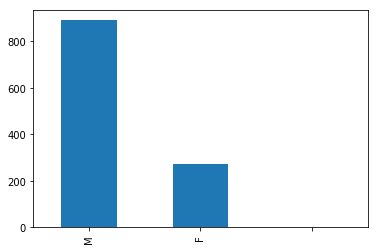

In [74]:
df.gender.value_counts().plot(kind='bar');

#### Top Sources
Out of the 4 sources, `Twitter for iPhone` is clearly the most widely used source to share tweets peratining to dogs.  

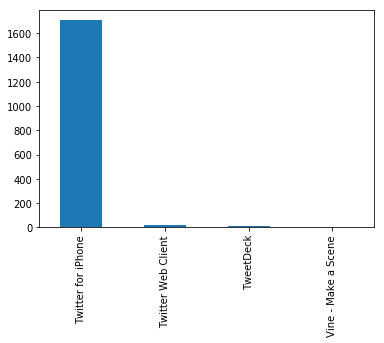

In [75]:
df.source.value_counts().plot(kind='bar');

#### Top Names
`Cooper`, `Lucy`, `Tucker` and `Charlie` are the most common dog names.

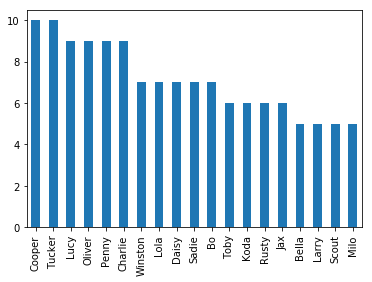

In [76]:
df.name.value_counts()[0:19].plot(kind='bar');

#### Top Breeds
`Golden Retriever` is top breed. 

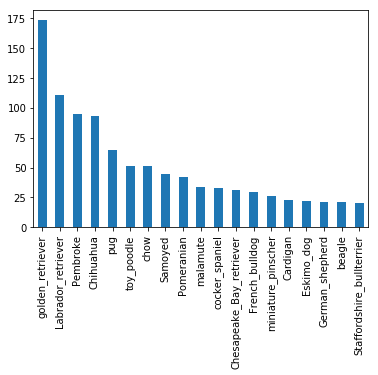

In [77]:
df.breed.value_counts()[0:19].plot(kind='bar');

#### Average Retweet and Favorite counts for dog breeds
`Standard_poodle` had the highest average retweet count while `Saluki` had the highest favorite count.

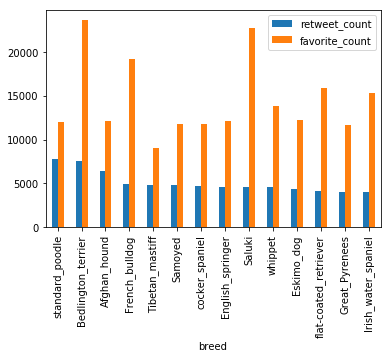

In [78]:
#group by breed and store the means of retweet_count and favorite_count.
df_group = df.groupby(['breed'])['retweet_count', 'favorite_count'].mean()
#order by retweet_count and favorite_count.
df_group = df_group.sort_values(['retweet_count', 'favorite_count'], ascending=False)
#plot the top 15 average counts.
df_group.iloc[0:14,].plot(kind='bar');